# Mulitple Linear Regression

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market.The company wants to know:

> Which variables are significant in predicting the price of a house, and

> How well those variables describe the price of a house.

 

## Step 1. Reading and understanding the data

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import scipy as sp
import scipy.stats as stats
import pylab 

import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset
housing_data = pd.read_csv("train.csv")

pd.set_option('display.max_columns',None) # helps display all the columns without the seperator ...

In [3]:
#head
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#summary
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#summary
housing_data.shape

(1460, 81)

In [6]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking for percentage nulls
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
#For all the categorical values, instead of null values, we shall add None. 
#It will indicate that, that particular feature is not available.

null_categoricals = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_categoricals:
    housing_data[i].fillna("none", inplace=True)

In [9]:
# Re-Checking for percentage nulls
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [10]:
# Since it is a numeric distribution, it can be imputed with similar values

housing_data['LotFrontage'].fillna(housing_data["LotFrontage"].median(), inplace=True)
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)

In [11]:
# Re-Checking for percentage nulls
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

## Step 2: Data Cleaning and Visualising the data

In [12]:
#encoding the categorical variables based on the information obtained from the data dictionary
def encode_overall_quality(m):
    return {
        1:'Very Poor',
        2:'Poor',
        3:'Fair',
        4:'Below Average',
        5:'Average',
        6:'Above Average',
        7:'Good',
        8:'Very Good',
        9:'Excellent',
        10:'Very Excellent',
    }[m]

housing_data['OverallQual'] = housing_data['OverallQual'].apply(lambda x : encode_overall_quality(x))

def encode_overall_cond(m):
    return {
        1:'Very Poor',
        2:'Poor',
        3:'Fair',
        4:'Below Average',
        5:'Average',
        6:'Above Average',
        7:'Good',
        8:'Very Good',
        9:'Excellent',
        10:'Very Excellent',
    }[m]

housing_data['OverallCond'] = housing_data['OverallCond'].apply(lambda x : encode_overall_cond(x))

def encode_fullbath(m):
    return {
       0:'Zero bathrooms',
       1:'One bathroom',
       2:'Two bathrooms',
       3:'Three bathrooms',
    }[m]

housing_data['FullBath'] = housing_data['FullBath'].apply(lambda x : encode_fullbath(x))

def encode_total_rooms_above_ground(m):
    return {
        1:'One Room',
        2:'Two Rooms',
        3:'Three Rooms',
        4:'Four Rooms',
        5:'Five Rooms',
        6:'Six Rooms',
        7:'Seven Rooms',
        8:'Eight Rooms',
        9:'Nine Rooms',
        10:'Ten Rooms',
        11:'Eleven Rooms',
        12:'Twelve Rooms',
        13:'Thirteen Rooms',
        14:'Fourteen Rooms',
    }[m]

housing_data['TotRmsAbvGrd'] = housing_data['TotRmsAbvGrd'].apply(lambda x : encode_total_rooms_above_ground(x))

def encode_fireplaces(m):
    return {
        0:'Zero Fireplaces',
        1:'One Fireplace',
        2:'Two Fireplaces',
        3:'Three Fireplaces',
    }[m]

housing_data['Fireplaces'] = housing_data['Fireplaces'].apply(lambda x : encode_fireplaces(x))

def encode_bedroom_above_ground(m):
    return {
        0:'Zero Bedrooms',
        1:'One Bedroom',
        2:'Two Bedrooms',
        3:'Three Bedrooms',
        4:'Four Bedrooms',
        5:'Five Bedrooms',
        6:'Six Bedrooms',
        7:'Seven Bedrooms',
        8:'Eight Bedrooms',
    }[m]

housing_data['BedroomAbvGr'] = housing_data['BedroomAbvGr'].apply(lambda x : encode_bedroom_above_ground(x))


In [13]:
def encode_garage_cars(m):
    return {
        0:'Zero Cars',
        1:'One Car',
        2:'Two Cars',
        3:'Three Cars',
        4:'Four Cars',
    }[m]

housing_data['GarageCars'] = housing_data['GarageCars'].apply(lambda x : encode_garage_cars(x))

#### Visualizing categorical variables

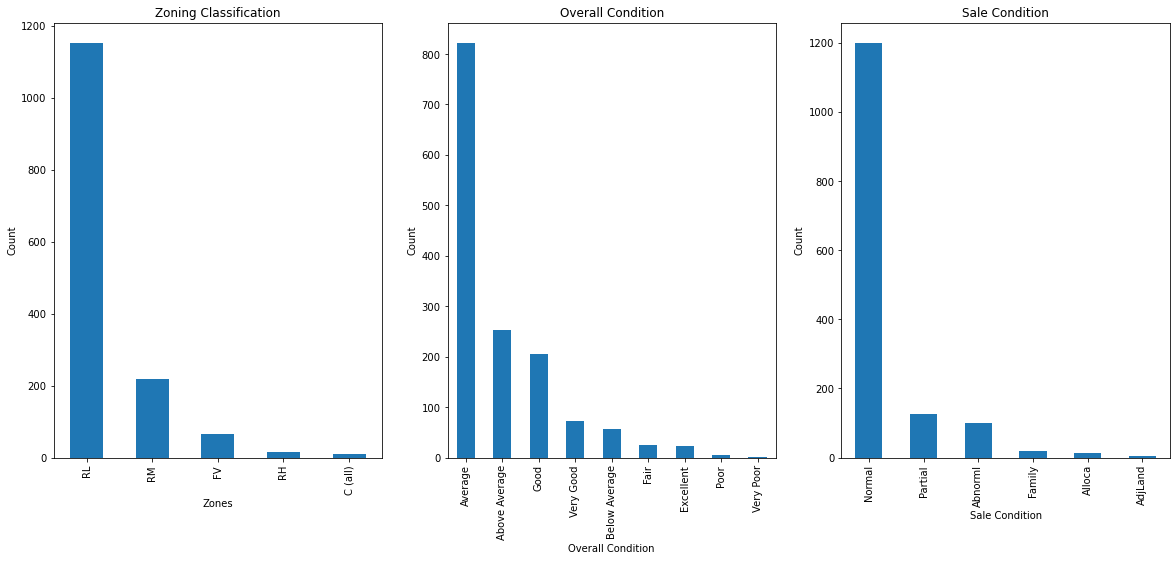

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
plt1 = housing_data.MSZoning.value_counts().plot(kind = 'bar')
plt.title('Zoning Classification')
plt1.set(xlabel = 'Zones', ylabel='Count')

plt.subplot(1,3,2)
plt1 = housing_data.OverallCond.value_counts().plot(kind = 'bar')
plt.title('Overall Condition')
plt1.set(xlabel = 'Overall Condition', ylabel='Count')


plt.subplot(1,3,3)
plt1 = housing_data.SaleCondition.value_counts().plot(kind = 'bar')
plt.title('Sale Condition')
plt1.set(xlabel = 'Sale Condition', ylabel='Count')

plt.show()

Inferences:

- Most of the houses are in low density residentail zone
- The overall condition of the houses are in average condition
- Most of the houses sales condition is normal

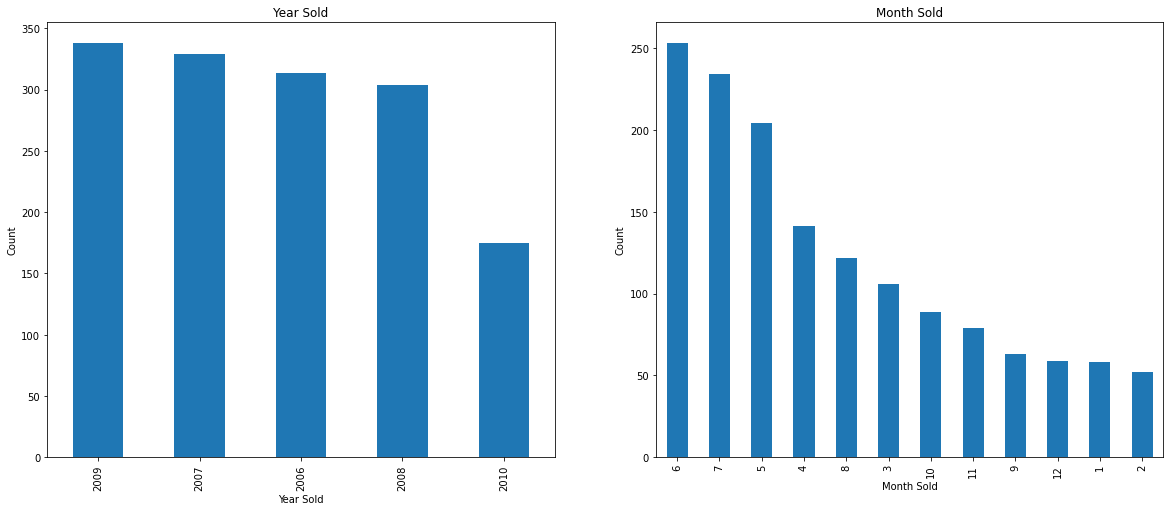

In [15]:
plt.figure(figsize=(20, 8))


plt.subplot(1,2,1)
plt1 = housing_data.YrSold.value_counts().plot(kind = 'bar')
plt.title('Year Sold')
plt1.set(xlabel = 'Year Sold', ylabel='Count')

plt.subplot(1,2,2)
plt1 = housing_data.MoSold.value_counts().plot(kind = 'bar')
plt.title('Month Sold')
plt1.set(xlabel = 'Month Sold', ylabel='Count')

plt.show()

Inferences:

- Most of the house prices are within budget
- There were more sales in the year 2009
- Most of them were sold in the month of June

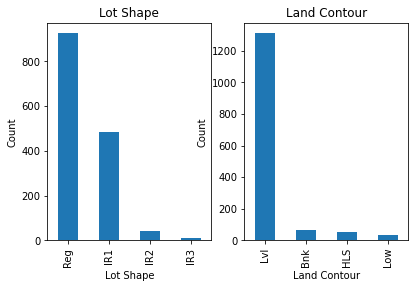

In [16]:
plt.figure(figsize=(10, 4))


plt.subplot(1,3,1)
plt1 = housing_data.LotShape.value_counts().plot(kind = 'bar')
plt.title('Lot Shape')
plt1.set(xlabel = 'Lot Shape', ylabel='Count')

plt.subplot(1,3,2)
plt1 = housing_data.LandContour.value_counts().plot(kind = 'bar')
plt.title('Land Contour')
plt1.set(xlabel = 'Land Contour', ylabel='Count')

plt.show()

Inferences:

- Most of the houses have a regular shape
- Most of the houses are built on a flat ground

#### Visualising Numeric Variables

In [17]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,1,1,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,0,1,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,1,1,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,0,1,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,1,1,2000.0,836,192,84,0,0,0,0,0,12,2008,250000


In [18]:
# Dropping ID Column
housing_numeric = housing_numeric.drop(['Id'], axis=1)
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,1,1,2003.0,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,0,1,1976.0,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,1,1,2001.0,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,0,1,1998.0,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,1,1,2000.0,836,192,84,0,0,0,0,0,12,2008,250000


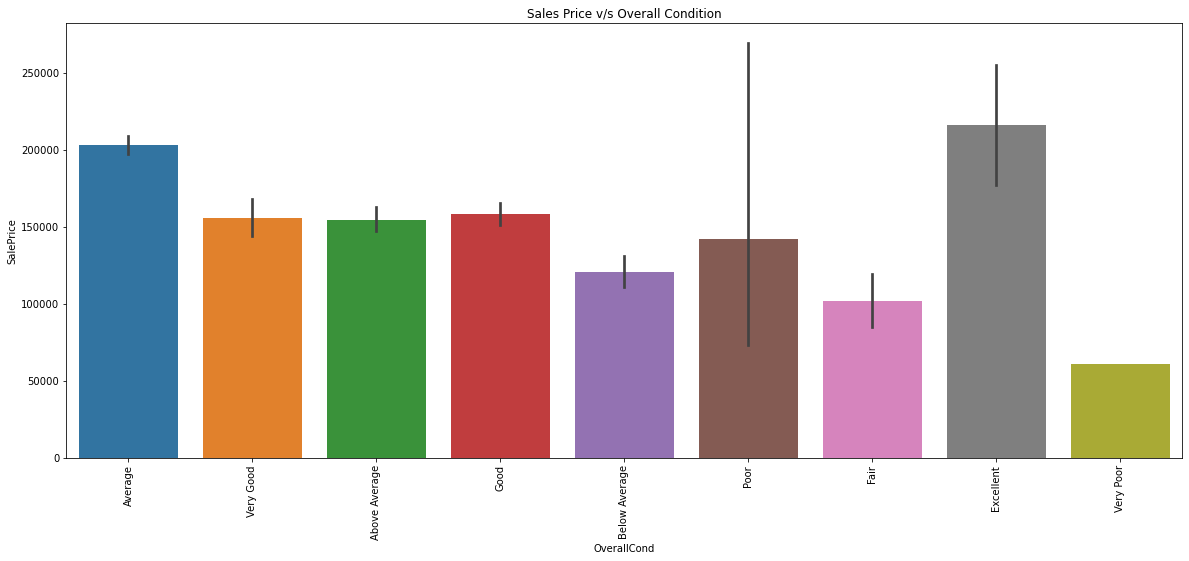

In [19]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_data)
plt.title("Sales Price v/s Overall Condition")
plt.xticks(rotation=90)
plt.show()

As the house condition is good, the sale price also increases

Sale Price v/s Living Area v/s Lot Area

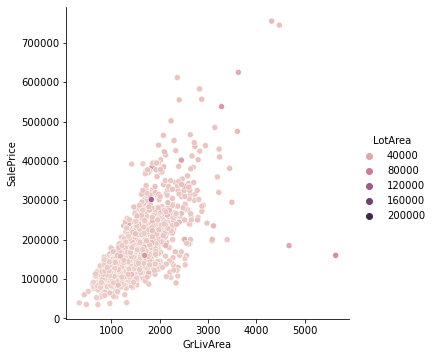

In [20]:
sns.pairplot(housing_numeric, x_vars='GrLivArea', y_vars='SalePrice',hue = 'LotArea',size=5, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

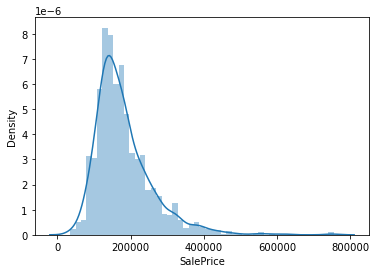

In [21]:
sns.distplot(housing_data['SalePrice'])

Since it is skewed to the left, we'll apply log transformation

In [22]:
#Log Transformation
housing_data['SalePrice']=np.log1p(housing_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

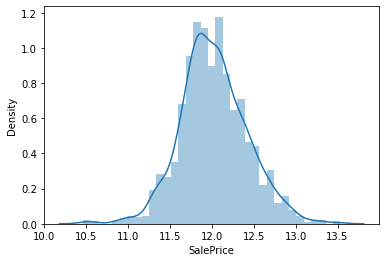

In [23]:
#re-checking the trend
sns.distplot(housing_data['SalePrice'])

In [24]:
# correlation matrix
cor = housing_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.177354,0.281721,0.081396,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.116685,0.083348,0.179459,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.047222,-0.004905,0.062996,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.014259,-0.017784,-0.025865,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.027850,0.116685,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.242656,-0.174800,0.777182,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.183331,-0.149598,0.616444,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.179459,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.201444,-0.037610,0.248346,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.214367,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.004262,-0.081007,0.148782,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.032148,-0.040751,-0.087684,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,-0.041118,0.030086,0.185610,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.363472,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,-0.048804,-0.068901,0.309386,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


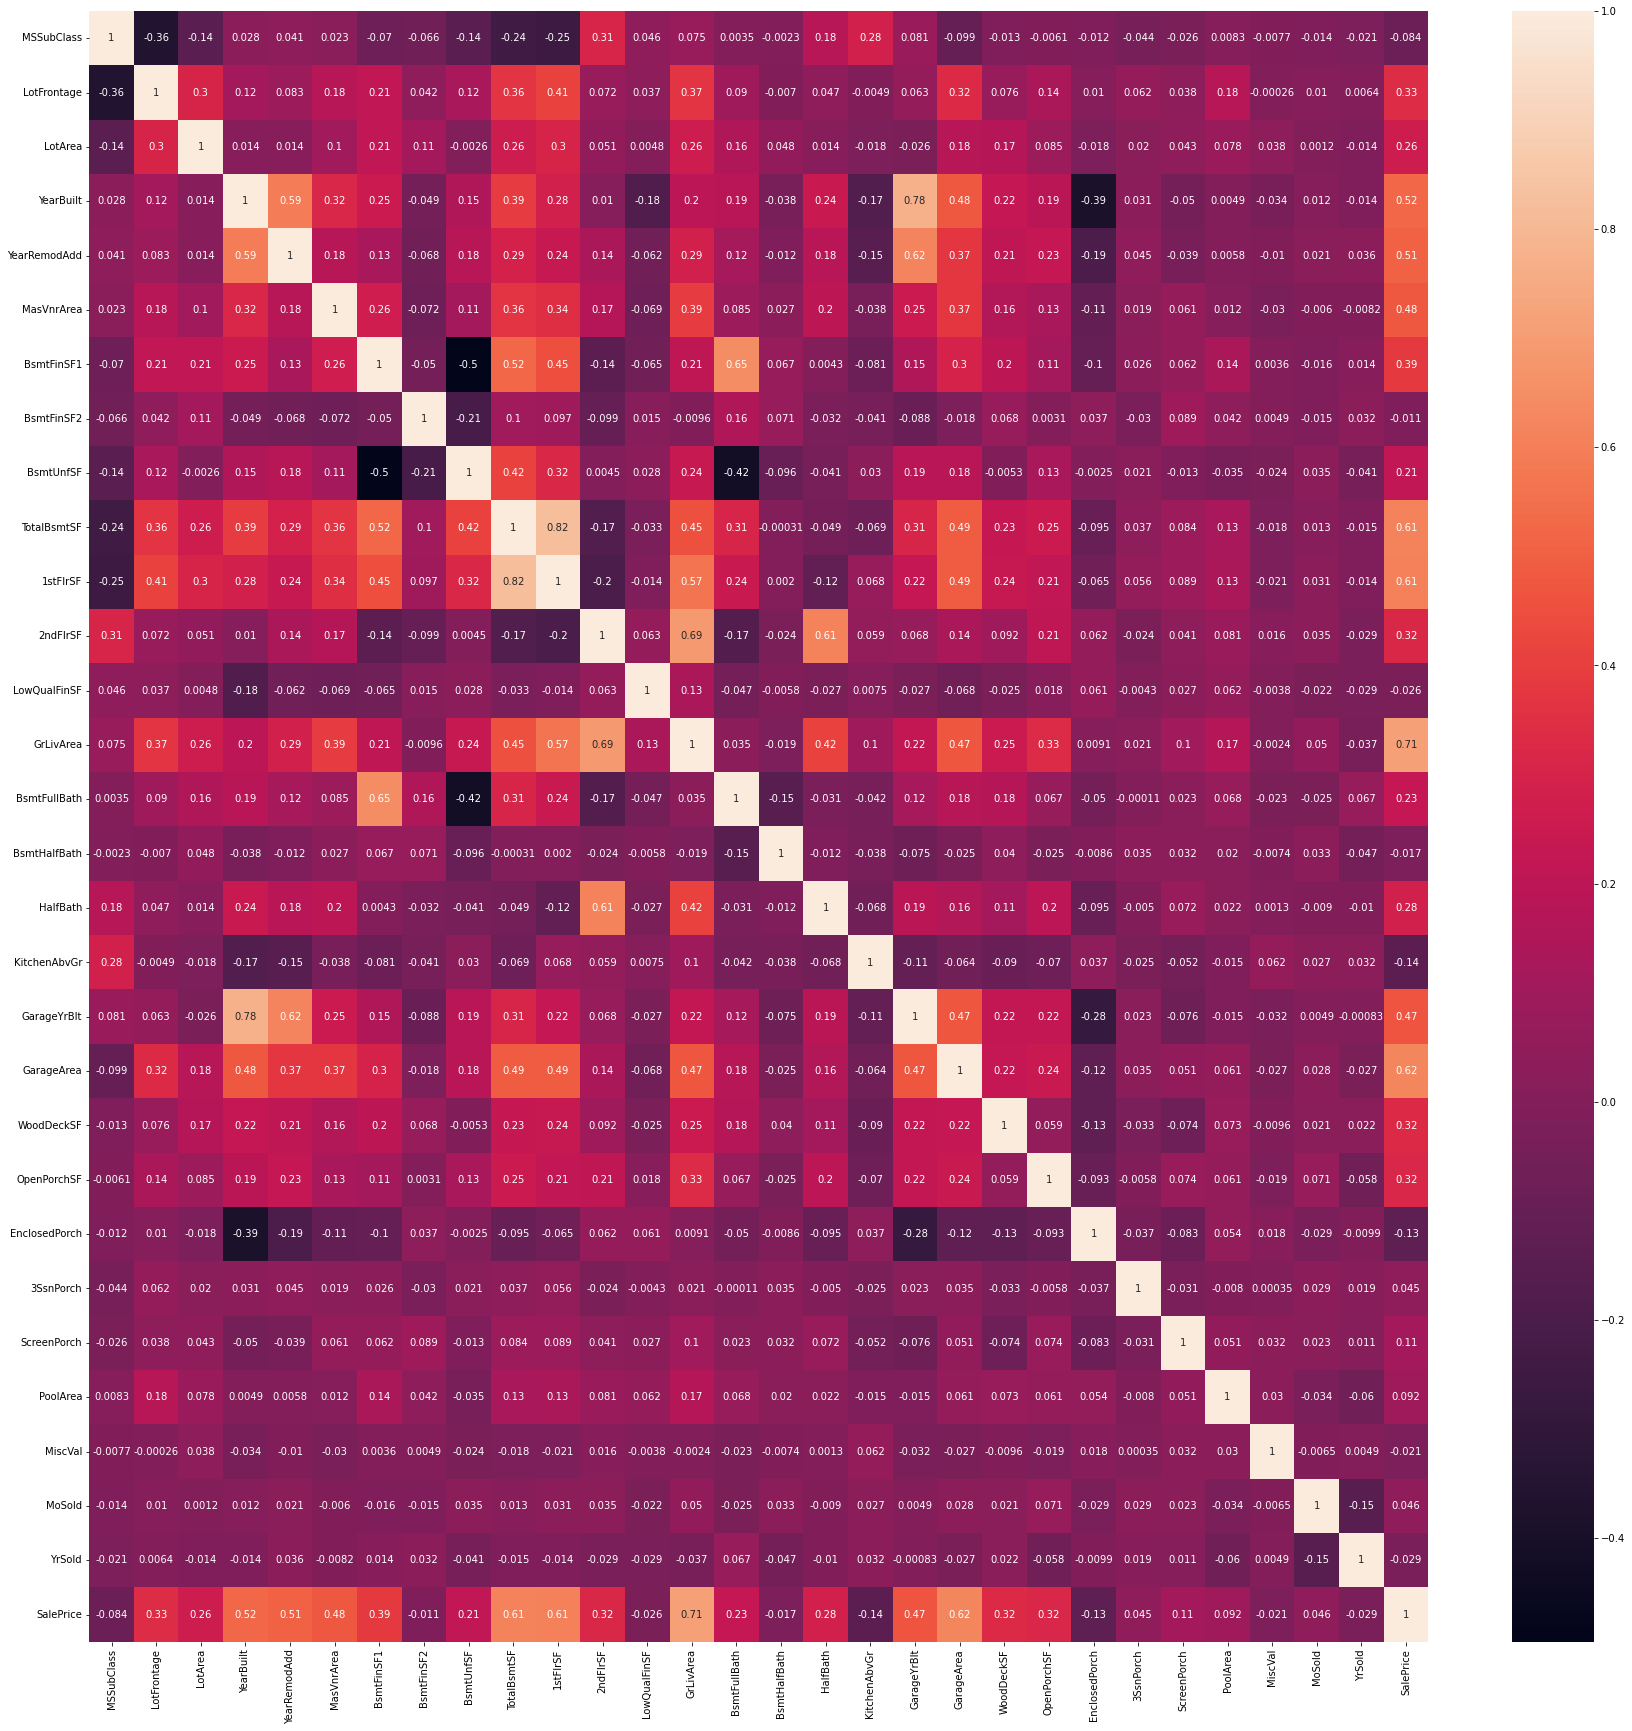

In [25]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

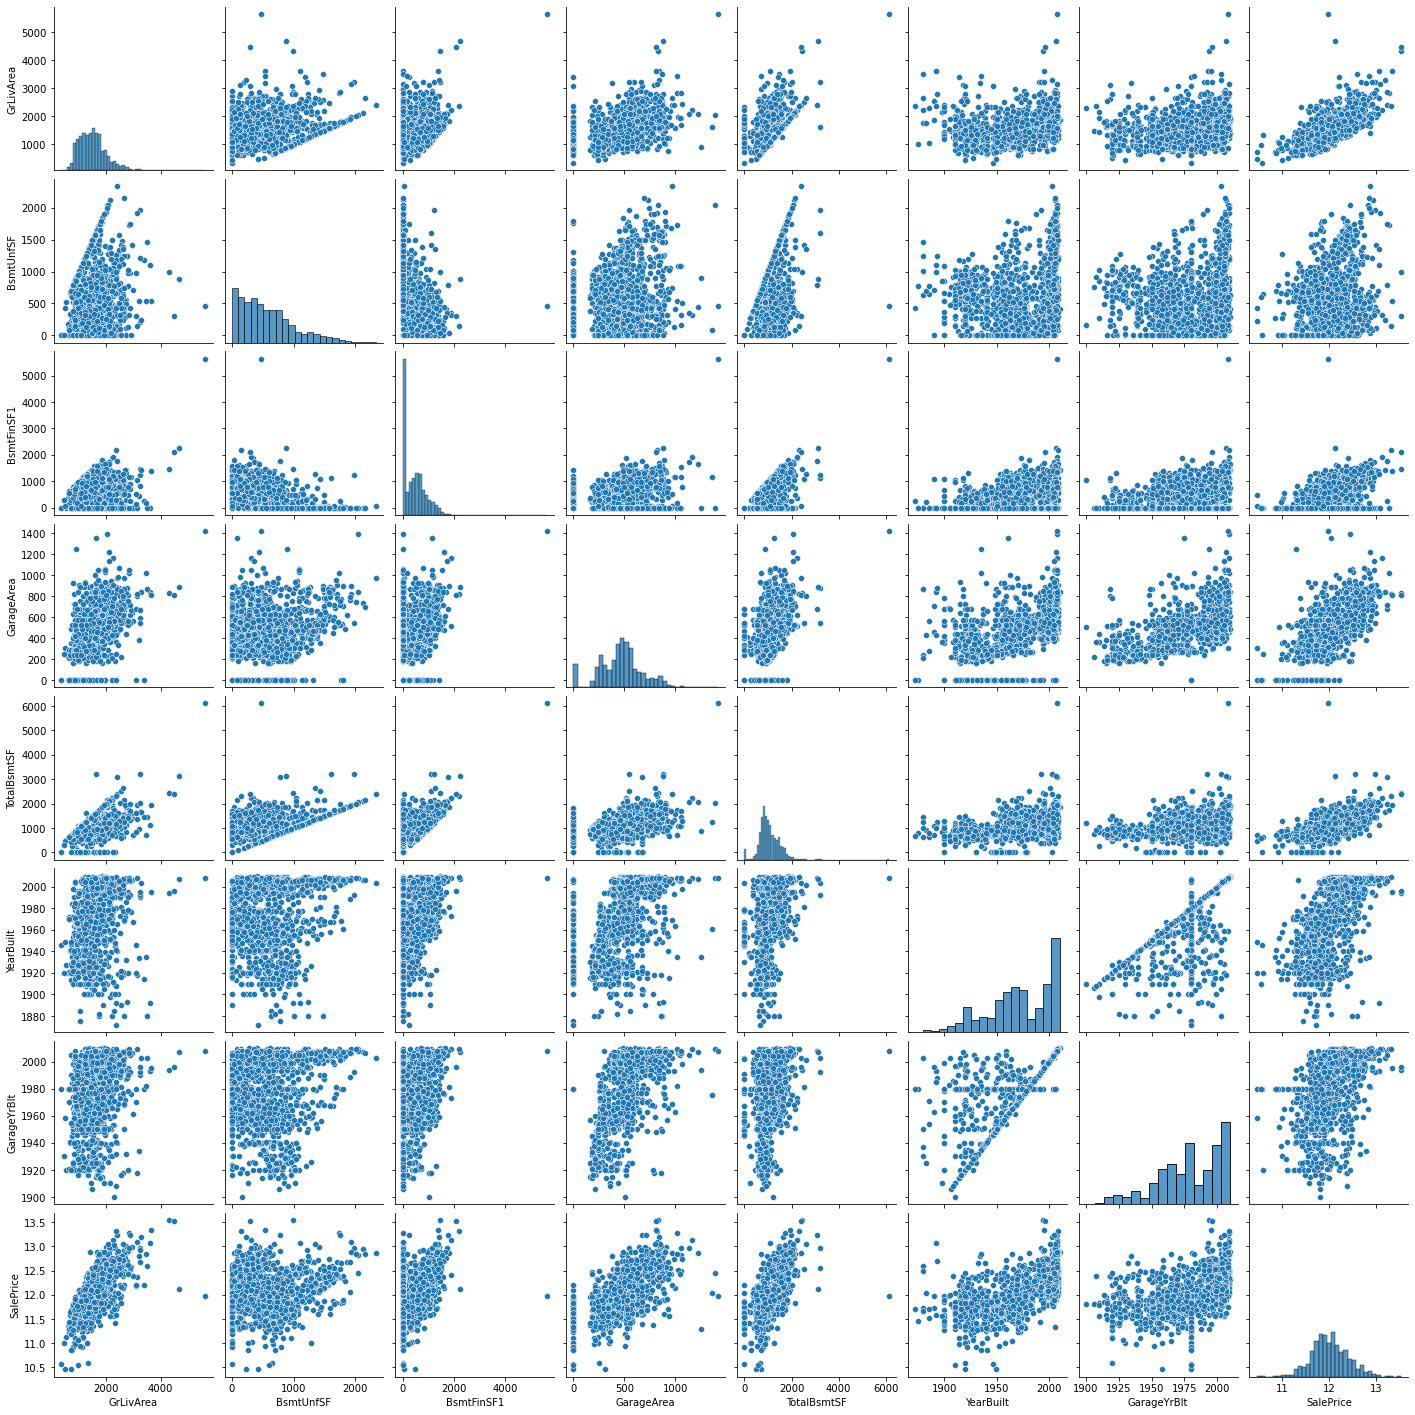

In [26]:
cols = [ 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt','SalePrice']
sns.pairplot(housing_data[cols], size = 2.5)
plt.show()

We can remove the correlated variables and the year associated variables as it will not add any value to the analysis

In [27]:
housing_data = housing_data.drop(['GarageCars'], axis = 1)
housing_data = housing_data.drop(['BsmtUnfSF'], axis = 1)
housing_data = housing_data.drop(['TotRmsAbvGrd'], axis = 1)
housing_data = housing_data.drop(['GarageYrBlt'], axis = 1)    
housing_data = housing_data.drop(['MoSold'], axis = 1)
housing_data = housing_data.drop(['YrSold'], axis = 1)
housing_data = housing_data.drop(['YearBuilt'], axis = 1)
housing_data = housing_data.drop(['YearRemodAdd'], axis = 1)

In [28]:
# Re-Checking for percentage nulls
housing_data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea  

In [29]:
#dropping the variables which are not going to add more value to the analysis
housing_data = housing_data.drop(['MiscVal', 'Alley', 'RoofMatl', 'Condition2','PoolQC', 'Heating', 'GarageCond', 'Fence', 'Functional','MasVnrArea' ,'Electrical'], axis = 1)

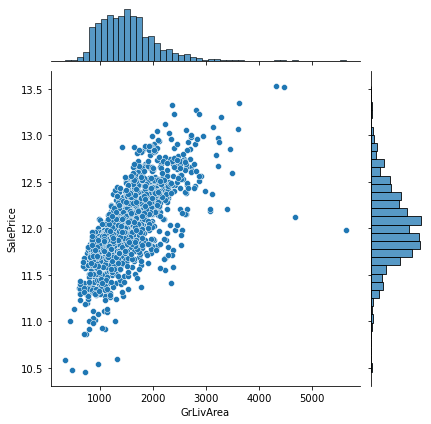

In [30]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=housing_data)
plt.show()

In [31]:
def outlier_treatment(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

# Removing some outliers on lower right side of 'GrLivArea'
housing_data = outlier_treatment(housing_data,'GrLivArea')

In [32]:
housing_data.shape

(1429, 62)

## Step 3 : Data Preparation

In [33]:
housing_data
housing_data = housing_data.drop(['Id'], axis=1)

Creating dummy variables

In [34]:
#1 creating dummy vars for overall quality
overall_quality_dummy = pd.get_dummies(housing_data['OverallQual'], drop_first=True)
overall_quality_dummy.head()

,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [35]:
#2 creating dummy vars for full bath
full_bath_dummy = pd.get_dummies(housing_data['FullBath'], drop_first=True)
full_bath_dummy.head()

,Three bathrooms,Two bathrooms,Zero bathrooms
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,1,0


In [36]:
#3 creating dummy vars for fireplaces
fireplaces_dummy = pd.get_dummies(housing_data['Fireplaces'], drop_first=True)
fireplaces_dummy.head()

,Three Fireplaces,Two Fireplaces,Zero Fireplaces
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [37]:
#4 creating dummy vars for bedrrom above grade
bedroom_dummy = pd.get_dummies(housing_data['BedroomAbvGr'], drop_first=True)
bedroom_dummy.head()

,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


In [38]:
# Dropping variables for which dummay has been created

housing_data = housing_data.drop(['OverallQual','FullBath', 'Fireplaces', 'BedroomAbvGr'], axis =1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,856,854,0,1710,1,0,1,1,Gd,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Very Good,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,1262,0,0,1262,0,1,0,1,TA,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,920,866,0,1786,1,0,1,1,Gd,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Average,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,961,756,0,1717,1,0,0,1,Gd,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,1145,1053,0,2198,1,0,1,1,Gd,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220


In [39]:
# concat the dummy variables  with the orginale df

housing_data= pd.concat([housing_data,overall_quality_dummy, full_bath_dummy,fireplaces_dummy, bedroom_dummy], axis =1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,856,854,0,1710,1,0,1,1,Gd,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Very Good,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,1262,0,0,1262,0,1,0,1,TA,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,920,866,0,1786,1,0,1,1,Gd,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Average,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,961,756,0,1717,1,0,0,1,Gd,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,1145,1053,0,2198,1,0,1,1,Gd,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [40]:
housing_data = pd.get_dummies(housing_data, drop_first=True )
housing_data.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,706,0,856,856,854,0,1710,1,0,1,1,548,0,61,0,0,0,0,12.247699,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [41]:
housing_data.shape

(1429, 231)

In [42]:
housing_data.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,706,0,856,856,854,0,1710,1,0,1,1,548,0,61,0,0,0,0,12.247699,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [43]:
X = housing_data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,706,0,856,856,854,0,1710,1,0,1,1,548,0,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [44]:
# Putting response variable to y
y = housing_data['SalePrice']

y.head()


0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [46]:
scaler = StandardScaler()

varcol = ['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
X_train[varcol] = scaler.fit_transform(X_train[varcol])
X_test[varcol] = scaler.fit_transform(X_test[varcol])
X_train.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.774565,0.154684,1.323938,-0.300737,0.345478,0.113320,1.995226,-0.111211,1.923409,1.131973,-0.250936,-0.727119,-0.222797,1.267298,0.485675,-0.351334,-0.378185,-0.115383,-0.268919,-0.054574,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Average,Below Average,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Three bathrooms,Two bathrooms,Zero bathrooms,Three Fireplaces,Two Fireplaces,Zero Fireplaces,Four Bedrooms,One Bedroom,Six Bedrooms,Three Bedrooms,Two Bedrooms,Zero Bedrooms,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.496062,-0.339155,-0.211663,0.997135,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,1.073876,-0.215271,-0.803081,-0.185172,0.530538,1.165362,-0.747921,-0.328244,-0.127886,-0.27671,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Step 4 : Model Building and Evaluation

In [48]:
# Since there are more than 200 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [49]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 5),
 ('LotFrontage', False, 115),
 ('LotArea', False, 56),
 ('BsmtFinSF1', False, 18),
 ('BsmtFinSF2', False, 113),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 102),
 ('BsmtHalfBath', False, 128),
 ('HalfBath', False, 64),
 ('KitchenAbvGr', False, 116),
 ('GarageArea', False, 48),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 131),
 ('EnclosedPorch', False, 104),
 ('3SsnPorch', False, 121),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 95),
 ('Average', False, 12),
 ('Below Average', False, 10),
 ('Excellent', True, 1),
 ('Fair', True, 1),
 ('Good', True, 1),
 ('Poor', True, 1),
 ('Very Excellent', True, 1),
 ('Very Good', True, 1),
 ('Very Poor', True, 1),
 ('Three bathrooms', False, 45),
 ('Two bathrooms', False, 68),
 ('Zero bathrooms', False, 125),
 ('Three Fireplaces', False, 76),
 ('Two Fireplaces', False, 105),
 ('Zero Fireplaces', True, 1

In [50]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'Excellent', 'Fair', 'Good', 'Poor', 'Very Excellent', 'Very Good',
       'Very Poor', 'Zero Fireplaces', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_Low', 'Utilities_NoSeWa',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'OverallCond_Excellent', 'OverallCond_Fair', 'OverallCond_Good',
       'OverallCond_Poor', 'OverallCond_Very Good', 'OverallCond_Very Poor',
       'RoofStyle_Gable', 'RoofStyle_Gambrel'

In [51]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'GarageArea',
       ...
       'PavedDrive_Y', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_none', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=130)

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Zero Fireplaces,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Low,Utilities_NoSeWa,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stucco,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Wood,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_TA,GarageQual_none,PavedDrive_P,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
11,0.345478,0.113320,1.995226,-0.111211,1.923409,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1070,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
513,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
467,-0.764234,-0.722635,1.060654,-0.111211,0.401627,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
993,-0.709617,-1.115022,1.046127,-0.111211,0.079368,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [53]:
X_train_rfe.shape

(1000, 100)

In [54]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9416249831365558

In [55]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.0370306436181698e+20

###### Test R2 value is too low.

In [56]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'Excellent', 'Fair', 'Good', 'Poor', 'Very Excellent', 'Very Good',
       'Very Poor', 'Zero Fireplaces', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_Low', 'Utilities_NoSeWa',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'OverallCond_Excellent', 'OverallCond_Fair', 'OverallCond_Good',
       'OverallCond_Poor', 'OverallCond_Very Good', 'OverallCond_Very Poor',
       'RoofStyle_Gable', 'RoofStyle_Gambrel'

In [57]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Excellent,Fair,Good,Poor,Very Excellent,Very Good,Very Poor,Zero Fireplaces,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Low,Utilities_NoSeWa,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNn,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stucco,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Wood,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_TA,GarageQual_none,PavedDrive_P,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
461,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
335,1.075768,1.258064,-0.435654,-0.09698,0.616745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
200,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
214,-0.891708,-1.249541,0.848688,-0.09698,-0.248718,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1003,1.515413,1.422541,-0.835813,-0.09698,0.383905,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## Ridge Regression

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021599,0.001957,0.009199,0.000750,0.0001,{'alpha': 0.0001},-0.100843,-0.088112,-0.099506,-0.097624,-0.098794,-0.096976,0.004553,26,-0.062566,-0.065280,-0.063386,-0.063372,-0.063812,-0.063683,0.000894
1,0.022743,0.003481,0.009056,0.000904,0.001,{'alpha': 0.001},-0.100801,-0.088079,-0.099478,-0.097593,-0.098536,-0.096897,0.004535,25,-0.062570,-0.065281,-0.063390,-0.063374,-0.063815,-0.063686,0.000893
2,0.019000,0.001786,0.009600,0.000801,0.01,{'alpha': 0.01},-0.100402,-0.087764,-0.099197,-0.097299,-0.096829,-0.096298,0.004458,24,-0.062609,-0.065294,-0.063436,-0.063395,-0.063858,-0.063718,0.000885
3,0.022249,0.000387,0.009261,0.000790,0.05,{'alpha': 0.05},-0.099188,-0.087139,-0.098091,-0.096225,-0.093580,-0.094844,0.004296,22,-0.062799,-0.065369,-0.063649,-0.063489,-0.064195,-0.063900,0.000859
4,0.021802,0.000978,0.008389,0.001359,0.1,{'alpha': 0.1},-0.098181,-0.086863,-0.097001,-0.095208,-0.091393,-0.093729,0.004131,21,-0.063026,-0.065502,-0.063887,-0.063612,-0.064560,-0.064117,0.000850


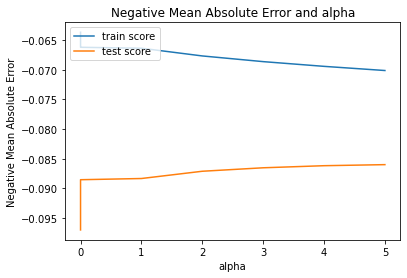

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [61]:
#fitting for alpha = 2 and penalising the model
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01389777,  0.00826288,  0.0218824 ,  0.03166119,  0.0083339 ,
        0.0431243 ,  0.03540496,  0.04804497,  0.00202469,  0.07245623,
        0.00957277, -0.00159198,  0.01723281, -0.01120191,  0.02593387,
        0.01384317, -0.00162491,  0.00747228,  0.0043699 ,  0.01282509,
        0.01040706, -0.03173808, -0.07252123,  0.1218284 , -0.14612287,
        0.04037234, -0.03526215,  0.04343195,  0.09370299, -0.08827929,
        0.04257483,  0.02779327, -0.00170045, -0.01973968,  0.01375639,
       -0.01453571,  0.01738277, -0.02649919,  0.00813694,  0.0305281 ,
        0.01869295,  0.0246947 ,  0.10715872,  0.0829619 ,  0.08905691,
        0.06164494,  0.01643924,  0.00582187, -0.01208747, -0.0037724 ,
        0.01777502, -0.02414424,  0.00535048, -0.01929186,  0.02357762,
       -0.02192666, -0.03159226, -0.02295772,  0.00497006, -0.04250704,
       -0.00795445, -0.02271826, -0.00748007,  0.04930857,  0.00907374,
        0.08760349, -0.0551112 ,  0.00422166, -0.11137124, -0.11

In [62]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.676),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.008),
 ('LotArea', 0.022),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.043),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.072),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', -0.002),
 ('HalfBath', 0.017),
 ('KitchenAbvGr', -0.011),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.007),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.01),
 ('Average', -0.032),
 ('Below Average', -0.073),
 ('Excellent', 0.122),
 ('Fair', -0.146),
 ('Good', 0.04),
 ('Poor', -0.035),
 ('Very Excellent', 0.043),
 ('Very Good', 0.094),
 ('Very Poor', -0.088),
 ('Three bathrooms', 0.043),
 ('Two bathrooms', 0.028),
 ('Zero bathrooms', -0.002),
 ('Three Fireplaces', -0.02),
 ('Two Fireplaces', 0.014),
 ('Zero Fireplaces', -0.015),
 ('Four Bedrooms', 0.017),
 ('One Bedroom', -0.026),
 ('Six Bedrooms', 0.008),
 ('Three Bedro

In [79]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9363126906424049
0.9121590174143901


In [64]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11208537855658122


In [65]:
# Creating a dataframe for the coefficients obtained from Ridge
modelr = list(zip(cols, model_parameters))
param = pd.DataFrame(modelr)
param.columns = ['Variable', 'Coeff']

param.sort_values(by=['Coeff'], ascending = False)

,Variable,Coeff
0,constant,11.676
24,Excellent,0.122
43,MSZoning_FV,0.107
106,OverallCond_Excellent,0.099
29,Very Good,0.094
...,...,...
30,Very Poor,-0.088
69,Neighborhood_IDOTRR,-0.111
70,Neighborhood_MeadowV,-0.112
107,OverallCond_Fair,-0.141


In [66]:
# variables whose coefficients are non-zero
pred = pd.DataFrame(param[(param['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.676
1,MSSubClass,-0.014
2,LotFrontage,0.008
3,LotArea,0.022
4,BsmtFinSF1,0.032
...,...,...
226,SaleCondition_AdjLand,0.046
227,SaleCondition_Alloca,0.003
228,SaleCondition_Family,0.009
229,SaleCondition_Normal,0.077


## Laso

In [67]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 230)
y_train (1000,)


In [68]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.237211,0.011983,0.008600,0.001021,0.0001,{'alpha': 0.0001},-0.089958,-0.084637,-0.091364,-0.090027,-0.082266,-0.087651,0.003545,1,-0.065480,-0.067413,-0.066241,-0.065376,-0.066848,-0.066272,0.000783
1,0.056614,0.003558,0.009062,0.001360,0.001,{'alpha': 0.001},-0.083513,-0.090957,-0.095413,-0.087241,-0.086848,-0.088794,0.004064,2,-0.079614,-0.080136,-0.078148,-0.079472,-0.077961,-0.079066,0.000857
2,0.025043,0.002945,0.009029,0.001605,0.01,{'alpha': 0.01},-0.113172,-0.112260,-0.119912,-0.115972,-0.111562,-0.114576,0.003061,3,-0.111310,-0.110437,-0.109094,-0.109793,-0.111523,-0.110431,0.000912
3,0.021138,0.002840,0.008392,0.001023,0.05,{'alpha': 0.05},-0.161068,-0.153547,-0.168285,-0.152873,-0.155326,-0.158220,0.005801,4,-0.156938,-0.158955,-0.154093,-0.155227,-0.157036,-0.156450,0.001668
4,0.020789,0.002474,0.009010,0.001093,0.1,{'alpha': 0.1},-0.193272,-0.186345,-0.194570,-0.176707,-0.183389,-0.186856,0.006572,5,-0.188145,-0.184998,-0.184140,-0.185227,-0.186705,-0.185843,0.001417


In [70]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

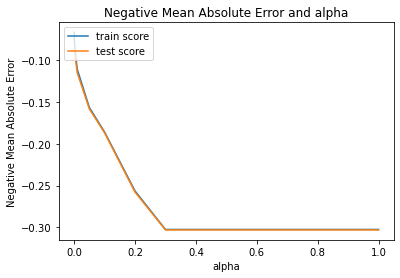

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
#At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.0118393 ,  0.00962247,  0.04579822,  0.        ,
        0.06805781,  0.        ,  0.        , -0.00690075,  0.14867513,
        0.0015909 ,  0.        ,  0.01252806, -0.03212706,  0.06007738,
        0.01240555,  0.        , -0.00873915,  0.        ,  0.00580167,
        0.00054909, -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.03125348, -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.01029886,
       -0.        ,  0.        ,  0.        , -0.        , -0.00054867,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.  

In [73]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.017),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.007),
 ('LotArea', 0.002),
 ('BsmtFinSF1', 0.044),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.076),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.158),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('HalfBath', 0.009),
 ('KitchenAbvGr', -0.034),
 ('GarageArea', 0.067),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.009),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('Average', -0.0),
 ('Below Average', -0.0),
 ('Excellent', 0.0),
 ('Fair', -0.0),
 ('Good', 0.0),
 ('Poor', -0.0),
 ('Very Excellent', 0.0),
 ('Very Good', 0.0),
 ('Very Poor', -0.0),
 ('Three bathrooms', 0.0),
 ('Two bathrooms', 0.0),
 ('Zero bathrooms', -0.0),
 ('Three Fireplaces', 0.0),
 ('Two Fireplaces', 0.0),
 ('Zero Fireplaces', -0.013),
 ('Four Bedrooms', -0.0),
 ('One Bedroom', -0.0),
 ('Six Bedrooms', -0.0),
 ('Three Bedrooms', 0.0),
 ('Two Bedrooms', -0.0),
 ('Zero Bedr

In [74]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.834287978407328
0.8394168292372102


In [75]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15154806125701153


#### The R2 values for Train and Test matches well, indicating an optimum model

In [76]:
# Creating a dataframe for the coefficients obtained from Lasso
model = list(zip(cols, model_parameters))
para = pd.DataFrame(model)
para.columns = ['Variable', 'Coeff']

para = para.sort_values(by=['Coeff'], ascending = False)


In [77]:
# variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.head(20)

,Variable,Coeff
0,constant,12.017
10,GrLivArea,0.158
6,TotalBsmtSF,0.076
15,GarageArea,0.067
158,Foundation_PConc,0.053
4,BsmtFinSF1,0.044
199,GarageType_Attchd,0.021
16,WoodDeckSF,0.011
13,HalfBath,0.009
2,LotFrontage,0.007


##### Observation

Model performance of Ridge was better in terms of R2 score
.Lasso seems better as it is robust

The higher values of positive coeeficients suggest a high sale value.
Some of those features are:
- MSZoning
- Overall Condition
- Overall Quality
- GrLivArea
- TotalBsmtSF	

The higher values of negative coeeficients suggest a decrease in sale value.

It is always profitable to buy a property when the market value is lower than the price salse value.